# Predict Customer Clicked Ads Classification By Using Machine Learning

Name : Azarya Yehezkiel Pinondang Sipahutar

**Project Overview**:
A company in Indonesia wants to know the effectiveness of their advertisements. It is essential for companies operating in the digital marketing consultant sector to find out how successful the advertisements they are marketing are so that they can attract customers to see the advertisements. In this mini project, I am responsible for looking for insights regarding user behaviour from this data by creating visualizations, creating machine learning relevant to the company's needs, and making recommendations from the findings obtained.

**Project Goals**<br>
Knowing the effectiveness of the advertisements displayed and the success of the advertisements being marketed allows them to optimize the way the company advertises on the internet and attract customers to see the advertisements.<br><br>

**Objective** <br> 
1. Find insights.

2. Clean data

3. Develop models.

4. Make business recommendations: 


## Task 1 - Customer Type And Behaviour Analysis On Advertisement
**Task Goals** :<br> Understand the characteristics and behaviors of customers in relation to advertisements.<br><br>

**Task Objective** :<br> 
- EDA (Exploratory Data Analysis) to find insights from the data.
- Univariate analysis to find insights from the data.
- Bivariate analysis to find insights from the data.
- Multivariate analysis to find insights from the data.
- Create visualizations to support the insights.

### Import Library

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

C:\Users\azary\AppData\Local\Temp\ipykernel_14120\1684181612.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Load Dataset & Premilinary Data Checking

In [82]:
df = pd.read_csv('./data/Clicked Ads Dataset.csv')
display(df.sample(4))

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
845,845,44.16,42,431836510.0,133.42,Laki-Laki,5/25/2016 0:34,Yes,Makassar,Sulawesi Selatan,House
341,341,72.23,48,369154310.0,115.35,Perempuan,7/17/2016 1:13,Yes,Bandar Lampung,Lampung,Fashion
974,974,41.88,40,309523760.0,126.11,Laki-Laki,2/28/2016 23:54,Yes,Denpasar,Bali,Food
586,586,78.29,38,404914720.0,252.07,Perempuan,1/5/2016 20:58,No,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Furniture


### Metadata
Column Name | Description
--- | ---
`daily_time_spent_on_site` | This is a numerical field that represents the amount of time a customer spends on the site daily. It's measured in minutes. 
`age` | This is a numerical field that represents the age of the customer.
`area_income` | This is a numerical field that represents the income of the area where the user lives. It's measured in Indonesian Rupiah.
`daily_internet_usage` | This is a numerical field that represents the amount of time a user spends on the internet daily. It's measured in minutes.
`gender` | This is a categorical field that represents the gender of the user. It's in Indonesian, with "Perempuan" meaning female and "Laki-Laki" meaning male.
`timestamp` | This is a datetime field that represents when the user clicked on the ad. It's in the format of month/day/year hour:minute.
`clicked_on_ad` | This is a categorical field that represents whether the user clicked on the ad. "No" means the user did not click on the ad.
`city` | This is a categorical field that represents the city where the user lives.
`province` | This is a categorical field that represents the province where the user lives.
`ad_category` | This is a categorical field that represents the category of the ad.

### EDA
Before we start to do EDA, we need to change the column name that not appropriate for better interpretation in analysis and column name consistency.

In [97]:
# Create a copy of the DataFrame to not modify the original DataFrame
dfe = df.copy()

# column rename
col_rename = {'Daily Time Spent on Site': 'daily_time_spent_on_site',
              'Age' : 'age',
              'Area Income': 'income',
              'Daily Internet Usage': 'daily_internet_usage',
              'Male':'gender',
              'Timestamp':'timestamp',
              'Clicked on Ad':'clicked_on_ad',
              'category' : 'ad_category'
}
dfe.rename(columns=col_rename, inplace=True)

In [98]:
# Display the infromation about the DataFrame
print("DataFrame Information:")
dfe.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   daily_time_spent_on_site  987 non-null    float64
 2   age                       1000 non-null   int64  
 3   income                    987 non-null    float64
 4   daily_internet_usage      989 non-null    float64
 5   gender                    997 non-null    object 
 6   timestamp                 1000 non-null   object 
 7   clicked_on_ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  ad_category               1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


From the dataframe information below, we can see that:
- The data has 11 columns and 1000 rows.
- The data has 3 data types, which are int64, float64, and object.
- The data has missing values in `daily_time_spent_on_site`, `area_income`, `daily_internet_usage`, `Gender`
- `Male` column should be changed to `Gender` column.
- `Unnamed: 0` is an index column.(this column will be dropped later).
- and other column names should be changed for column name consistency.

In [99]:
# Display the summary statistics of numerical columns
numericals = dfe.select_dtypes(['int64', 'float64'])
categoricals = dfe.select_dtypes(['object'])

print("Numerical Columns Sumarry Statistics:")
display(numericals.describe().T)

print("\nCategorical Columns Summary Statistics:")
display(categoricals.describe().T)

Numerical Columns Sumarry Statistics:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.000,499.500,288.819,0.000,249.750,499.500,749.250,999.000
daily_time_spent_on_site,987.000,64.930,15.845,32.600,51.270,68.110,78.460,91.430
age,1000.000,36.009,8.786,19.000,29.000,35.000,42.000,61.000
income,987.000,384864670.638,94079989.569,97975500.000,328632990.000,399068320.000,458355450.000,556393600.000
daily_internet_usage,989.000,179.864,43.870,104.780,138.710,182.650,218.790,267.010



Categorical Columns Summary Statistics:


,count,unique,top,freq
gender,997,2,Perempuan,518
timestamp,1000,997,5/26/2016 15:40,2
clicked_on_ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
ad_category,1000,10,Otomotif,112


Upon the **Numerical Column Statistics Summary** i found that:
- The mean of all numerical columns are not too far from the median, which means the data is not too skewed.
- `daily_time_spent_on_site` minimum is 32.60 minutes and maximum is 91.43 minutes, this means that from all our customers, the minimum time they spent on our site is 32.60 minutes and the maximum time they spent on the site is 91.43 minutes.
- `age` minimum Age is 19 and maximum Age is 61 (this information will be helpfull for binning the Age column later).
- Minimum `income` is 13996.50 and maximum `income` is 79484.80.
- Minimum `daily_internet_usage` is 104.78 and maximum `daily_internet_usage` is 269.96, this means that from all our customers, the minimum time they spent on the internet is 104.78 minutes and the maximum time they spent on the internet is 269.96 minutes.<br><br>

Upon the **Categorical Column Statistics Summary** i found that:
- Top `gender` in our data is Female(Perempuan) with 518 frequency.(this columns contains missing values).
- Top `timestamp` in our data is 2016-03-27 00:53:11 with 2 frequency.
- `clicked_on_ad` is our target column, and the value of yes and no is balanced (50:50). 
- Top `city` in our data is Surabaya with 64 frequency.
- Top `province` where the customer lives in our data is Daerah Khusus Ibukota Jakarta with 253 frequency.
- Top `ad_category` that the customer clicked in our data is Automotive with 170 frequency.

#### Missing Values and Duplicate

In [4]:
missing_data = dfe.isna().sum()
missing = missing_data[missing_data > 0]


missing_percentage = (dfe.isna().sum() / len(dfe)) * 100
percentage = missing_percentage[missing_percentage > 0]
percentage = percentage.map('{:.2f}%'.format)

print('Missing Data:')
display(missing)
print('\nMissing Data Percentage:')
display(percentage)

Missing Data:


daily_time_spent_on_site    13
area_income                 13
daily_internet_usage        11
gender                       3
dtype: int64


Missing Data Percentage:


daily_time_spent_on_site    1.30%
area_income                 1.30%
daily_internet_usage        1.10%
gender                      0.30%
dtype: object

Missing values on this dataset is under 5% so i will decide after EDA process.

In [5]:
dfe.duplicated().sum()

0

the dataset has 0 duplicate rows.

#### Univariate Analysis

##### Categorical Data

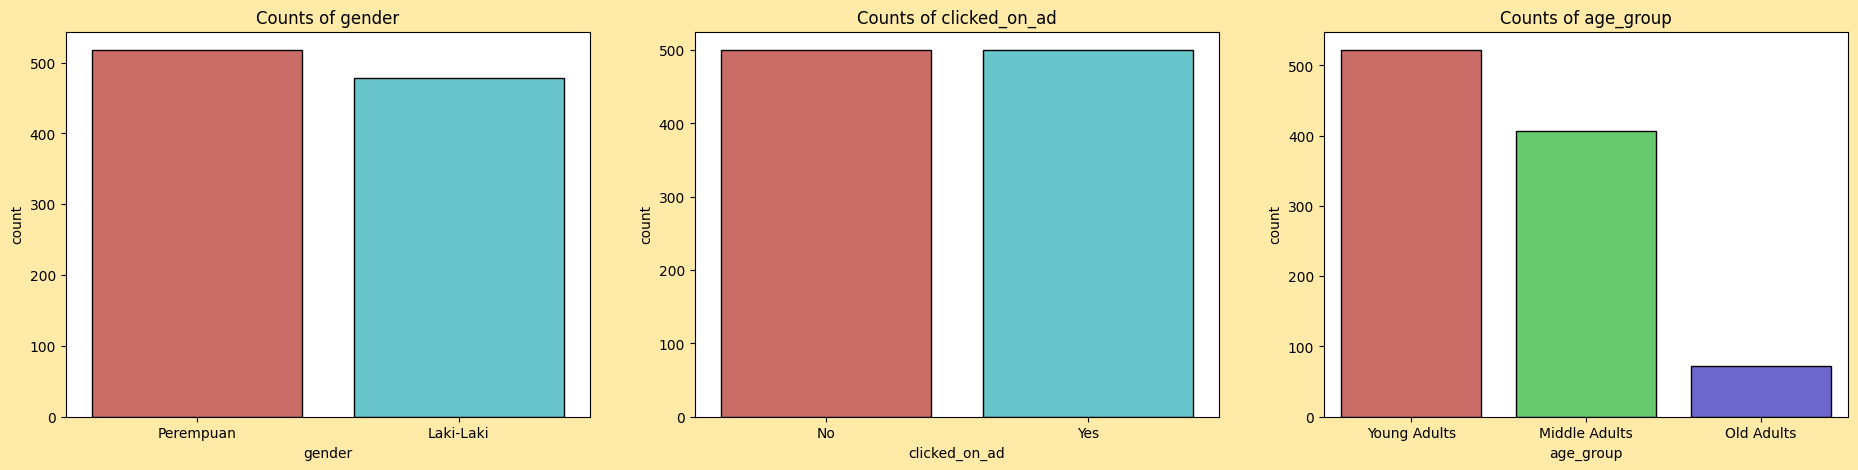

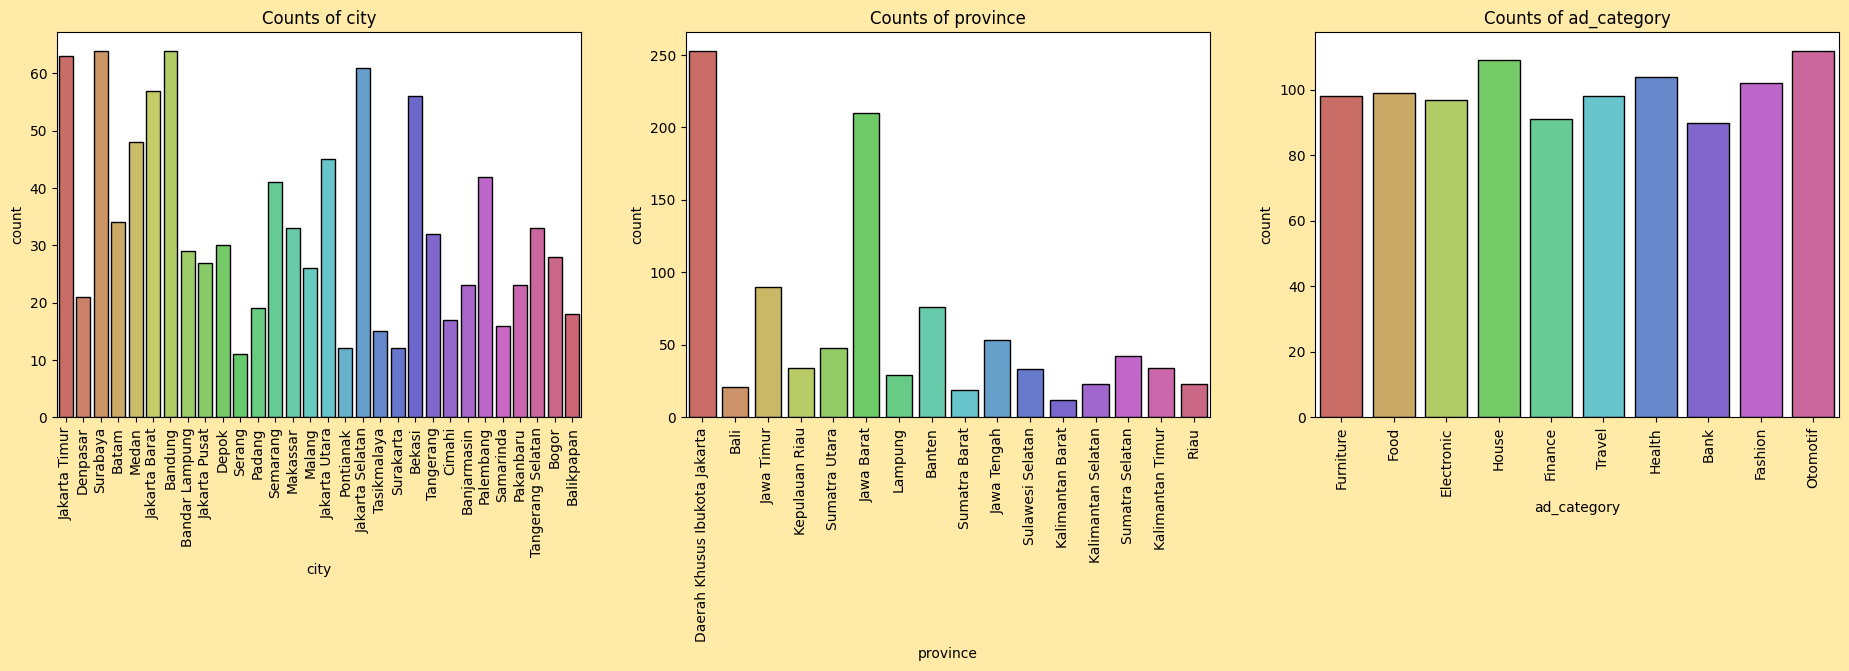

In [8]:
lowvar = dfe[['gender', 'clicked_on_ad', 'age_group']]
highvar = dfe[['city', 'province', 'ad_category']]

fig, ax = plt.subplots(1, 3, figsize=(23, 5))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(lowvar.columns, ax.flatten()):
    sns.countplot(x=i, data=lowvar, ax=subplot, hue=i, legend=False, palette='hls', edgecolor='black')
    subplot.set_title(f'Counts of {i}')


fig, ax = plt.subplots(1, 3, figsize=(23, 5))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(highvar.columns, ax.flatten()):
    sns.countplot(x=i, data=highvar, ax=subplot, hue=i, legend=False, palette='hls', edgecolor='black')
    subplot.set_title(f'Counts of {i}')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

for city column in bivariate analysis i will use province column to represent the city because the unique value of city column is too much, and i want to make it more general for the analysis also for machine learning model later.

##### Numerical Data

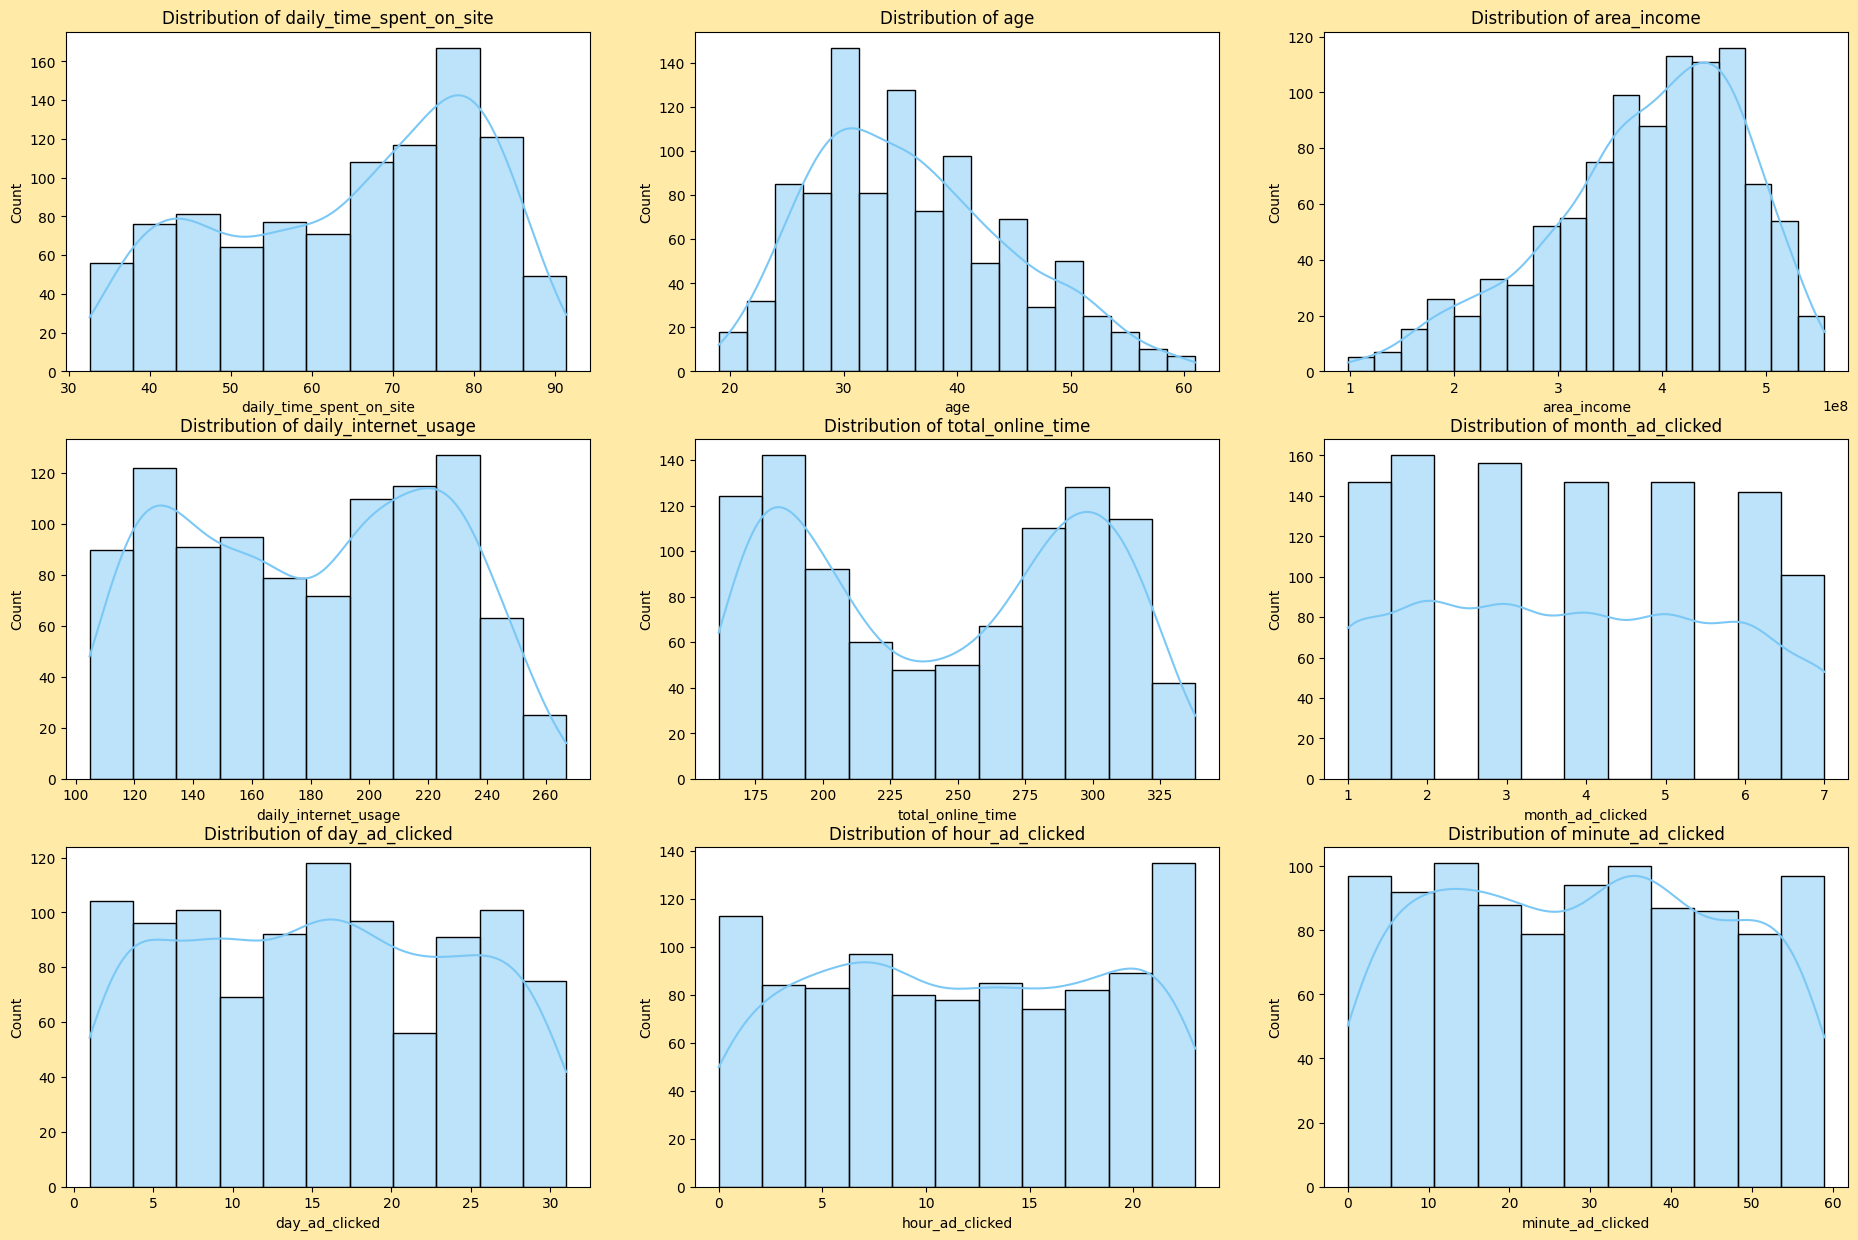

In [9]:
num = dfe[['daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage', 'total_online_time', 'month_ad_clicked', 'day_ad_clicked', 'hour_ad_clicked', 'minute_ad_clicked']]
fig, ax = plt.subplots(3, 3, figsize=(23, 15))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(num.columns, ax.flatten()):
    sns.histplot(x=i, data=num, ax=subplot, kde=True, edgecolor='black', color='xkcd:lightblue')
    subplot.set_title(f'Distribution of {i}')
    

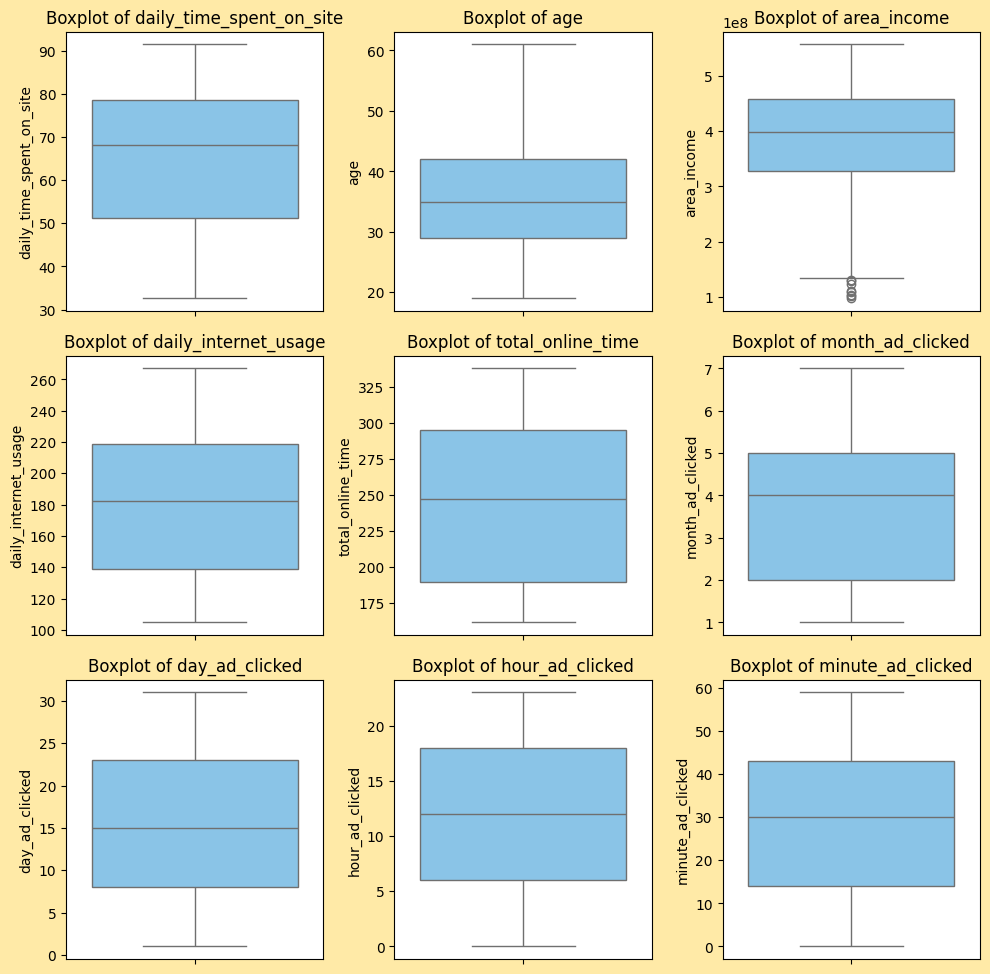

In [10]:
num = dfe[['daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage', 'total_online_time', 'month_ad_clicked', 'day_ad_clicked', 'hour_ad_clicked', 'minute_ad_clicked']]
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(num.columns, ax.flatten()):
    sns.boxplot(y=i, data=num, ax=subplot, color='xkcd:lightblue')
    subplot.set_title(f'Boxplot of {i}')

fig.tight_layout()

#### Bivariate Analysis

##### Categorical Data

C:\Users\azary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\azary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\azary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping 

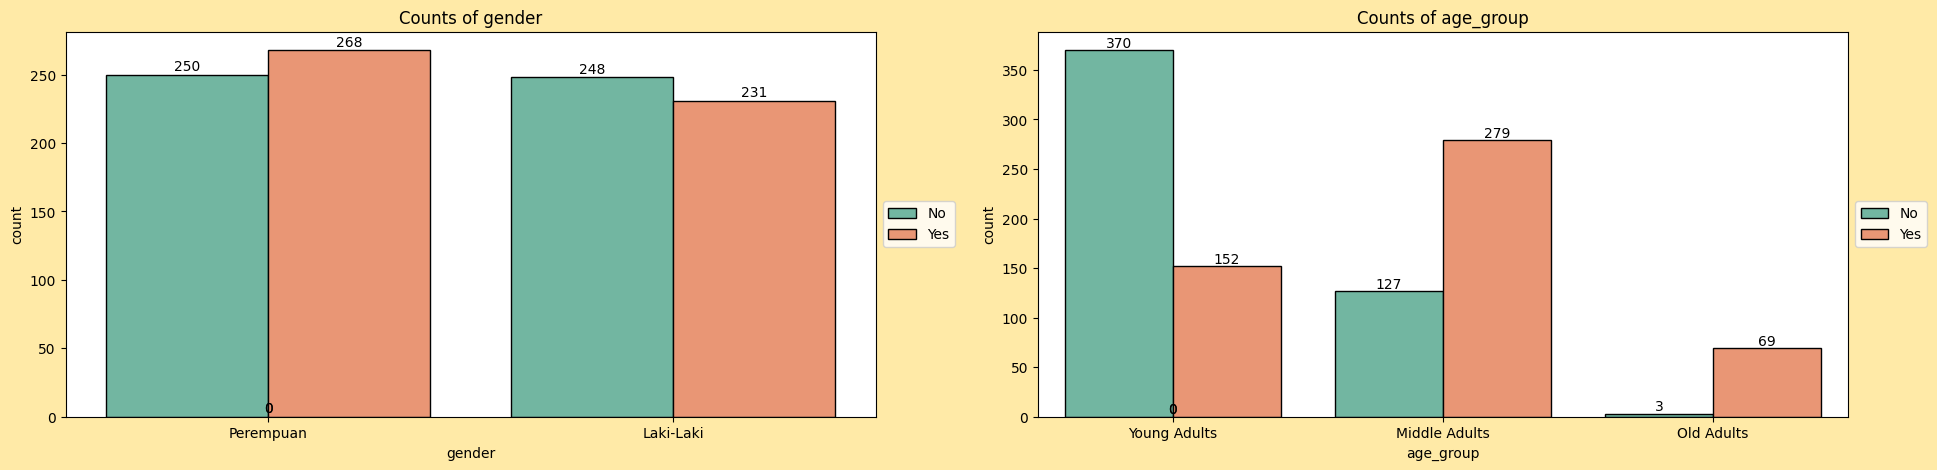

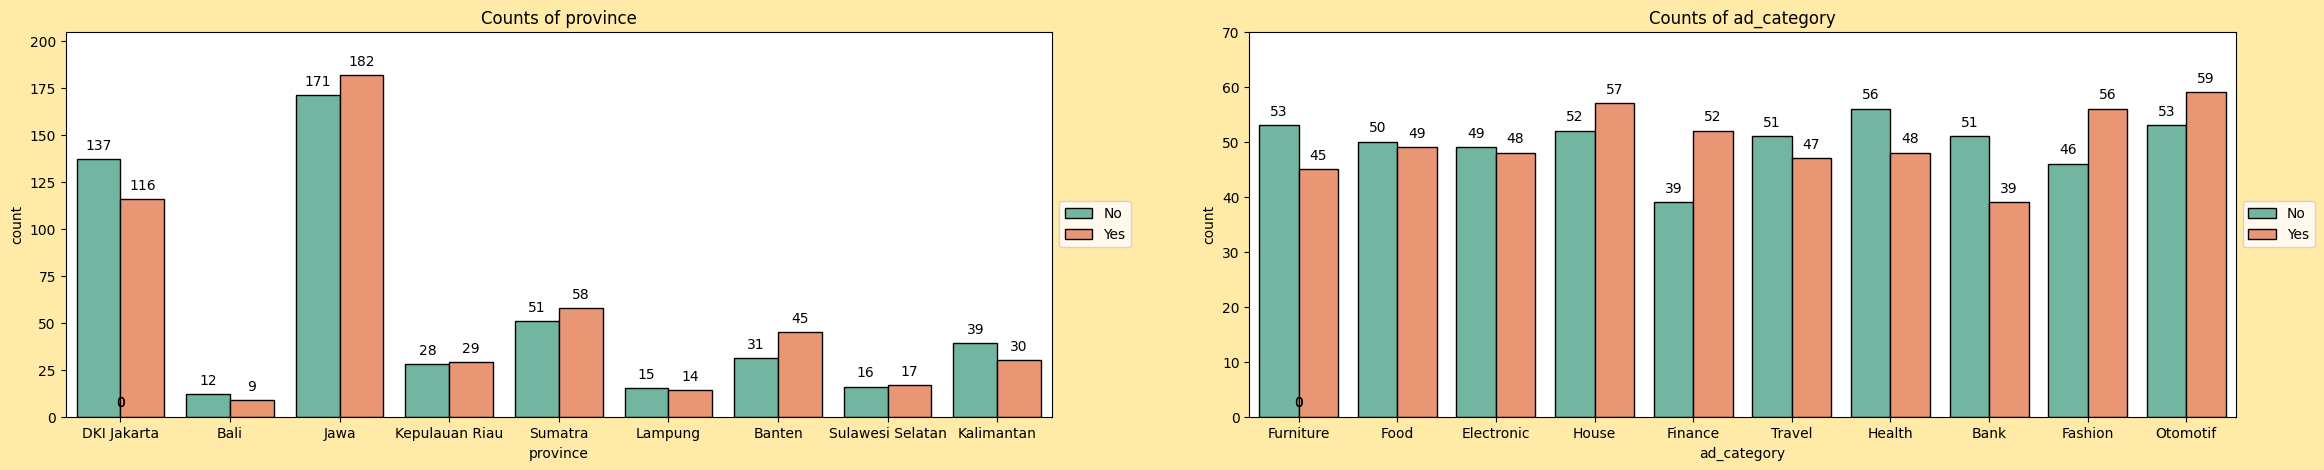

In [33]:
lowvar = dfe[['gender', 'age_group']]
highvar = dfe[['province', 'ad_category']]


fig, ax = plt.subplots(1, 2, figsize=(23, 5))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(lowvar.columns, ax.flatten()):
    sns.countplot(x=i, data=lowvar, ax=subplot, hue=dfe['clicked_on_ad'], palette='Set2', edgecolor='black')
    subplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    subplot.set_title(f'Counts of {i}')
    for p in subplot.patches:
        height = p.get_height()
        subplot.text(p.get_x()+p.get_width()/2.,
                     height + 3,
                     '{:1.0f}'.format(height),
                     ha="center") 
    


def map_province(province):
    province_mapping = {
        'Daerah Khusus Ibukota Jakarta': 'DKI Jakarta',
        'Jawa Timur': 'Jawa',
        'Jawa Barat': 'Jawa',
        'Jawa Tengah': 'Jawa',
        'Kepulauan Riau': 'Sumatra',
        'Sumatra Utara': 'Sumatra',
        'Sumatra Selatan': 'Sumatra',
        'Sumatra Barat': 'Sumatra',
        'Riau': 'Kepulauan Riau',
        'Kepulauan Riau': 'Kepulauan Riau',
        'Kalimantan Timur': 'Kalimantan',
        'Kalimantan Selatan': 'Kalimantan',
        'Kalimantan Tengah': 'Kalimantan',
        'Kalimantan Barat': 'Kalimantan',
    }
    return province_mapping.get(province, province)
dfe['province'] = dfe['province'].apply(map_province)

fig, ax = plt.subplots(1, 2, figsize=(28, 5))
fig.set_facecolor('#FFEAA7')

for index, (i, subplot) in enumerate(zip(highvar.columns, ax.flatten())):
    sns.countplot(x=i, data=highvar, ax=subplot, hue=dfe['clicked_on_ad'], palette='Set2', edgecolor='black')
    subplot.set_title(f'Counts of {i}')
    subplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    for label in subplot.get_xticklabels():
        label.set_rotation(0)
    for p in subplot.patches:
        subplot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points')
    if index == 0:
        subplot.set_ylim([0, 205])
    else:
        subplot.set_ylim([0, 70])

##### Numerical Data

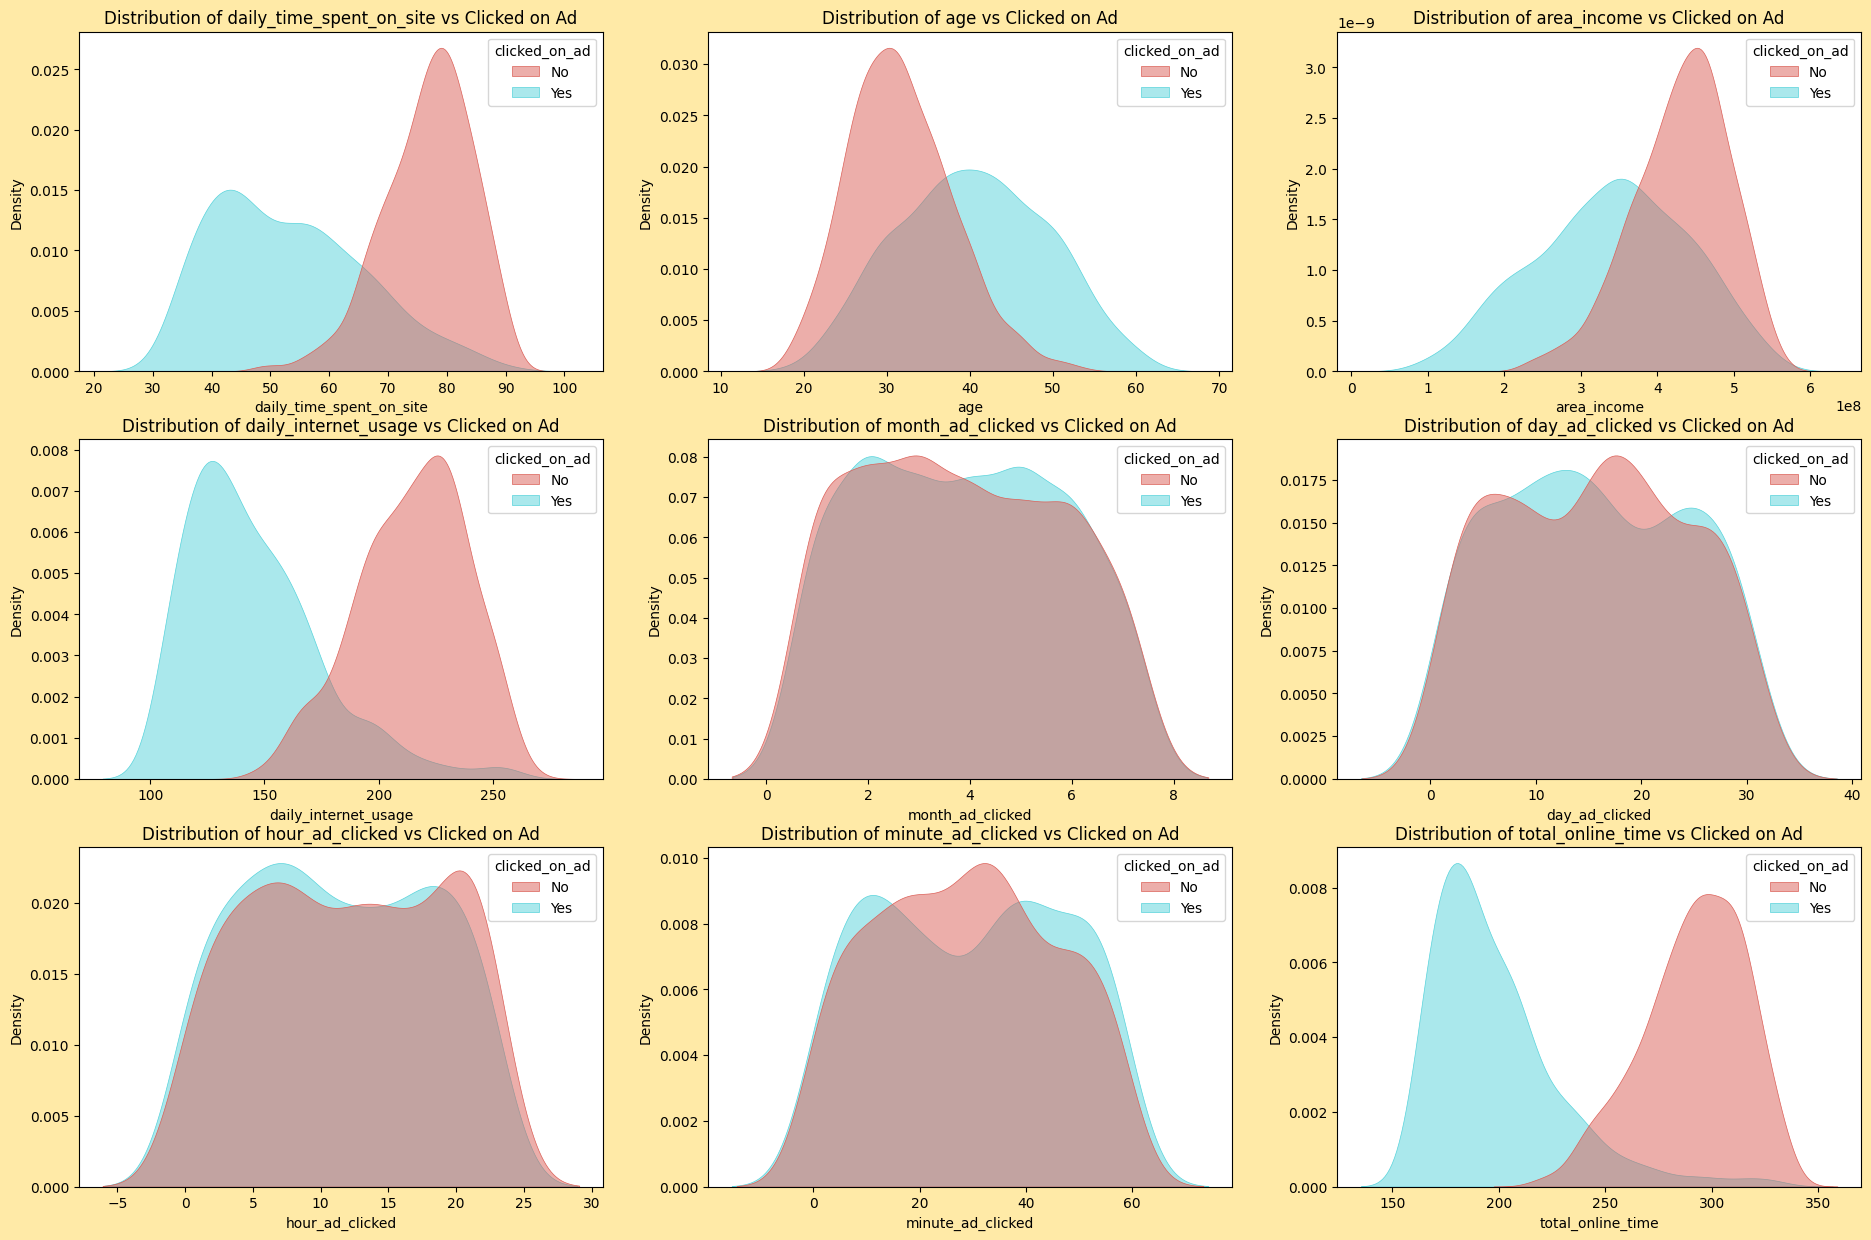

In [23]:
num = dfe.select_dtypes(include='number').drop(columns='Unnamed: 0')

fig, ax = plt.subplots(3, 3, figsize=(23,15))
fig.set_facecolor('#FFEAA7')

for i, subplot in zip(num.columns, ax.flatten()):
    sns.kdeplot(x=i, data=num, hue=dfe['clicked_on_ad'], palette='hls', fill=True, alpha=0.5, linewidth=0.5, ax=subplot)
    subplot.set_title(f'Distribution of {i} vs Clicked on Ad')

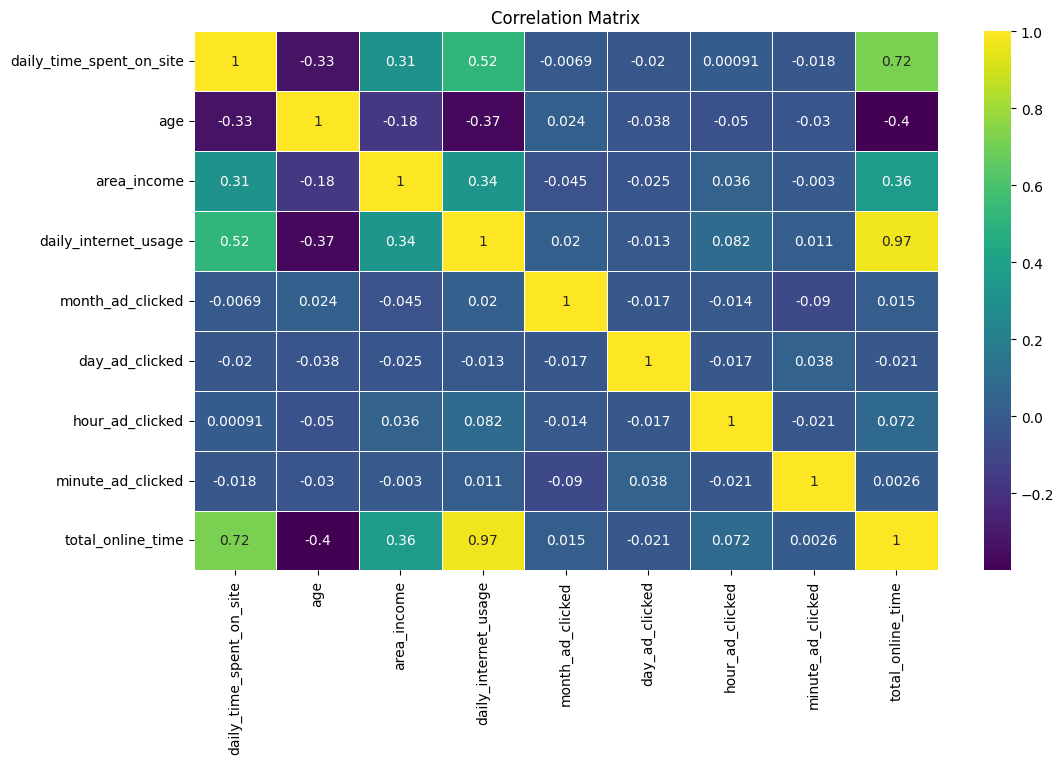

In [70]:
plt.figure(figsize=(12, 7))
plt.facecolor='#FFEAA7'
sns.heatmap(num.corr(), annot=True, cmap='viridis', linewidths=0.5, annot_kws={'size': 10})
plt.title('Correlation Matrix')
plt.show()

### Feature Engineering

[Age Grouping Binning Preferences](https://www.quanthub.com/power-bi-group-and-bin-data/#:~:text=Binning%20is%20a%20technique%20used,to%20analyze%20trends%20more%20effectively).

In [ ]:
# Age Group
age_group = [
    (dfe['age'] >= 51),
    (dfe['age'] >= 36) & (dfe['age'] < 51),
    (dfe['age'] >= 19) & (dfe['age'] < 36)
]
age_binning = ['Old Adults', 'Middle Adults', 'Young Adults']
dfe['age_group'] = np.select(age_group, age_binning)

# Extract timestamp for new features
dfe['timestamp'] = pd.to_datetime(dfe['timestamp'])
dfe['month_ad_clicked'] = dfe['timestamp'].dt.month.astype('int64')
dfe['day_ad_clicked'] = dfe['timestamp'].dt.day.astype('int')
dfe['hour_ad_clicked'] = dfe['timestamp'].dt.hour.astype('int')
dfe['minute_ad_clicked'] = dfe['timestamp'].dt.minute.astype('int')

# 
dfe['total_online_time'] = dfe['daily_time_spent_on_site'] + dfe['daily_internet_usage']

### Feature Selection

In [ ]:
# Chi Square Test
def chi_square_test(df, var1, var2):
    crosstab = pd.crosstab(df[var1], df[var2])
    stat, p, dof, expected = chi2_contingency(crosstab)
    print(f'p-value: {p}')
    if p <= 0.05:
        print('Reject H0')
    else:
        print('Fail to Reject H0')
    return crosstab

categorical_col = dfe.select_dtypes(include='object').columns.tolist()

for column in categorical_col:
    if column != 'clicked_on_ad':
        print(f'\nChi-Square Test between {column} and clicked_on_ad')
        chi_square_test(dfe, column, 'clicked_on_ad')

In [20]:
# Get the list of numerical columns
numerical_columns = dfe.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize an empty DataFrame to store the results 
annova_results = pd.DataFrame(columns=['Feature', 'F-statistic', 'p-value', 'Significant'])

# perform ANOVA for each numerical column
for i, column in enumerate(numerical_columns):
    groups = dfe.groupby('clicked_on_ad')[column].apply(list)
    f_stat, p_value = stats.f_oneway(*groups)

    # Determine whether the correlation is significant
    significant = 'Yes' if p_value <= 0.05 else 'No'

    # Add the results to the DataFrame
    annova_results.loc[i] = [column, f_stat, p_value, significant]

# Display the results
annova_results


,Feature,F-statistic,p-value,Significant
0,Unnamed: 0,0.580808,4.461757e-01,No
1,daily_time_spent_on_site,NaN,NaN,No
2,age,319.643165,3.129808e-62,Yes
3,area_income,NaN,NaN,No
4,daily_internet_usage,NaN,NaN,No
5,month_ad_clicked,0.258613,6.111873e-01,No
6,total_online_time,NaN,NaN,No
